# Diabetes Prediction

#### Importing the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support
import pickle
import warnings
warnings.filterwarnings("ignore")

#### Reading the dataset

In [2]:
data = pd.read_csv("diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#### Understanding the dataset

In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

We can see there are few data points for columns, "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", which have values "0", that can't be possible. So we can replace that value with the mean of each column. 

In [6]:
data["Glucose"] = data["Glucose"].replace(0, data["Glucose"].mean())
data["BloodPressure"] = data["BloodPressure"].replace(0, data["BloodPressure"].mean())
data["SkinThickness"] = data["SkinThickness"].replace(0, data["SkinThickness"].mean())
data["Insulin"] = data["Insulin"].replace(0, data["Insulin"].mean())
data["BMI"] = data["BMI"].replace(0, data["BMI"].mean())

In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Visualizing the dataset

<AxesSubplot: >

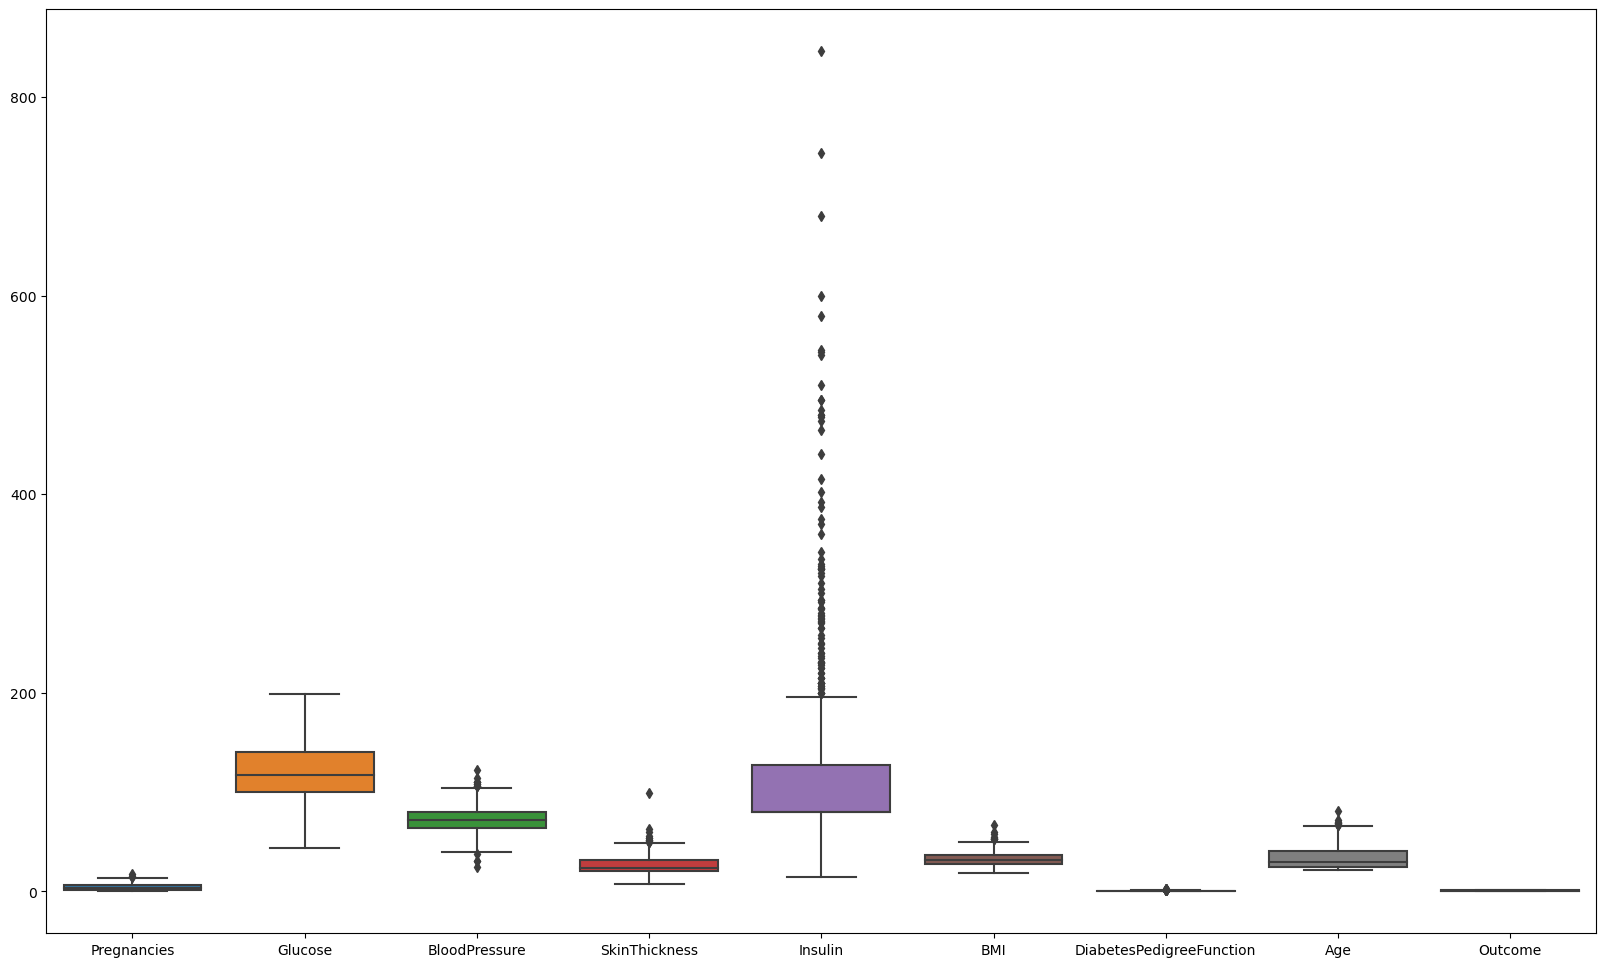

In [8]:
plt.figure(figsize=(20,12))
sn.boxplot(data =data)

In [9]:
n_data = data.copy()

In [10]:
n_data.drop(columns= "Insulin", inplace=True)

<AxesSubplot: >

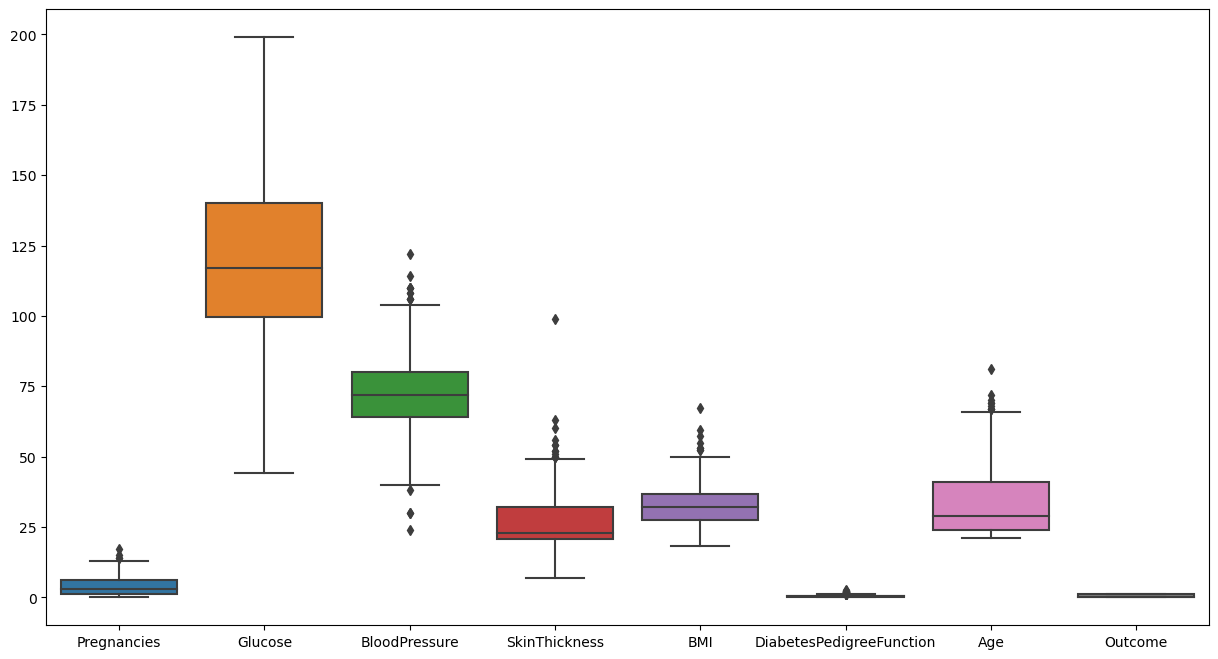

In [11]:
plt.figure(figsize=(15,8))
sn.boxplot(data = n_data)

#### Seperating and creating the dependent and independent variables

In [12]:
x = data.iloc[:,:-1]
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [13]:
y = data.iloc[:,-1]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

#### Seperating the variables into training and testing

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((514, 8), (254, 8), (514,), (254,))

#### Standardization 

In [15]:
def scaler_standard(x_train, x_test):
    scaler = StandardScaler()
    x_train_scaler = scaler.fit_transform(x_train)
    x_test_scaler = scaler.transform(x_test)
    
    # saving the model by making pickle file
    scaler_file = open("standard_scaler.pkl","wb")
    pickle.dump(scaler,scaler_file)
    scaler_file.close()
    
    return x_train_scaler, x_test_scaler

In [16]:
x_train_scaled, x_test_scaled = scaler_standard(x_train, x_test)

In [17]:
print(x_train_scaled)

[[-1.15724929 -0.55808571  1.46411916 ... -0.41807087 -0.84072395
   1.08828024]
 [ 0.26238349 -0.35592203 -0.03271532 ... -1.25545122 -0.2293975
  -0.57107102]
 [ 0.26238349 -1.50151625  0.79885939 ...  0.49276389 -0.96007817
   0.12760319]
 ...
 [-0.02154307 -0.7602494   0.29991456 ... -1.35828741 -0.76503592
  -1.09507668]
 [-1.15724929  0.35165088  0.46622951 ... -0.00672614 -0.2701526
  -1.09507668]
 [-0.02154307 -0.7602494  -0.36534521 ...  0.05203739 -0.99210003
  -0.04706536]]


In [18]:
print(x_test_scaled)

[[-0.58939618 -0.72655545 -0.69797509 ... -0.40337999 -0.34292956
  -1.09507668]
 [ 0.54631005 -0.42330992 -1.03060498 ... -1.09385151 -0.81452425
  -0.57107102]
 [-1.15724929  0.65489641 -0.27341722 ...  1.4623622  -0.81743533
  -0.39640247]
 ...
 [-0.30546962  1.39616326 -0.19903026 ... -0.12425321 -0.63403739
  -0.48373674]
 [-0.87332273  0.11579324 -0.19903026 ... -1.19668769 -0.77085807
  -0.74573957]
 [-0.87332273 -1.09718888 -0.53166015 ... -0.63843412 -0.9280563
  -1.09507668]]


#### Building the model i.e: Logistic Regression

In [19]:
log_reg = LogisticRegression()

log_reg.fit(x_train_scaled, y_train)

LogisticRegression()

#### Haperparameter Tuning (Grid Search CV)

In [20]:
from sklearn.model_selection import GridSearchCV

parameters = {
    "penalty":["l1","l2","elasticnet"],
    "C":np.logspace(-3,3,7),
    "solver":["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]
}

In [21]:
gscv = GridSearchCV(estimator = log_reg,            # Model
                    param_grid = parameters,        # Hper Parameter Tuning
                    scoring = "accuracy",           # metric for scoring
                    cv=10)                          # no. of folds

gscv.fit(x_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [22]:
gscv.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}

In [23]:
gscv.best_score_

0.7623303167420815

In [24]:
log_reg = LogisticRegression(penalty="l1", solver="liblinear",C=0.1)
log_reg.fit(x_train_scaled, y_train)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [25]:
y_pred = log_reg.predict(x_test_scaled)

In [26]:
y_pred

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0])

In [27]:
log_reg.predict_proba(x_test_scaled)

array([[0.86161251, 0.13838749],
       [0.82573744, 0.17426256],
       [0.41686643, 0.58313357],
       [0.88100003, 0.11899997],
       [0.18093428, 0.81906572],
       [0.66405582, 0.33594418],
       [0.94480786, 0.05519214],
       [0.20790438, 0.79209562],
       [0.56226021, 0.43773979],
       [0.90551885, 0.09448115],
       [0.1723526 , 0.8276474 ],
       [0.48790238, 0.51209762],
       [0.86058317, 0.13941683],
       [0.41082692, 0.58917308],
       [0.92206166, 0.07793834],
       [0.58716977, 0.41283023],
       [0.59831422, 0.40168578],
       [0.87005699, 0.12994301],
       [0.40825908, 0.59174092],
       [0.90456628, 0.09543372],
       [0.52696156, 0.47303844],
       [0.22926753, 0.77073247],
       [0.14084814, 0.85915186],
       [0.82853387, 0.17146613],
       [0.9272489 , 0.0727511 ],
       [0.70710266, 0.29289734],
       [0.86783277, 0.13216723],
       [0.0568101 , 0.9431899 ],
       [0.52766459, 0.47233541],
       [0.79337139, 0.20662861],
       [0.

In [28]:
print(confusion_matrix(y_test,y_pred))

[[148  22]
 [ 34  50]]


In [29]:
print(accuracy_score(y_test, y_pred))

0.7795275590551181


In [30]:
file = open("model.pkl","wb")
pickle.dump(log_reg,file)
file.close()